In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv("data.csv")
df.describe()

df_x = df.iloc[:, 1:]
df_y = df.iloc[:, 0]












In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Most of these features are of type float64, but some of them are of type int64. We can label these features as categorical features.

In [ ]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
#Niektóre featury przyjmują jako wartości jedynie 1 lub 0. Wtedy przyjmują typ int64.

numeric_features = df.dtypes[df.dtypes != 'int64'].index
categorical_features = df.dtypes[df.dtypes == 'int64'].index

df[categorical_features].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

Liability-Assets flag przyjmuję wartość 1, jeśli wartość Pasyw, długów (ang. Liability) przekracza wartość Aktyw posiadanych przez firmę, a 0, gdy ilość aktyw przewyższa ilość długów. 0 jest pozytywną wartośćią z punktu widzenia zdrowia finansowego firmy.

In [ ]:
print(df[[' Liability-Assets Flag','Bankrupt?']].value_counts())

 Liability-Assets Flag  Bankrupt?
0                       0            6597
                        1             214
1                       1               6
                        0               2
dtype: int64


Jest bardzo mało firm, w których pasywa są większe niż aktywa w tym zbiorze danych. Widzimy,że 6 na 8 firm, dla których pasywa były większe,zbankrutowało. Ale też musimy pamiętać,że klasy są niezbalansowane.


In [ ]:
print(df[' Net Income Flag'].value_counts())

1    6819
Name:  Net Income Flag, dtype: int64


Feature ' Net Income Flag' przyjmuje jedną wartość, jest bezużyteczny.
Dla wszystkich firm Net Income w ciągu ostatnich 2 lat był mniejszy niż 0.
To oznacza, że wszystkie opisane w zbiorze danych firmy miały straty w ciągu ostatnich dwóch lat

In [ ]:
# Class balance

print(df['Bankrupt?'].value_counts())
print('-'* 30)
print('Financially stable: ', round(df['Bankrupt?'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Financially unstable: ', round(df['Bankrupt?'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

#Klasy są zdecydowanie niezbalansowane. Trzeba będzie to rozwiązać później




0    6599
1     220
Name: Bankrupt?, dtype: int64
------------------------------
Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset


In [ ]:
from imblearn.over_sampling import SMOTE


X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']


X_train_temp, X_test, y_train_temp, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.5, random_state=42)

smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


Most of the firms in the dataset bankrupted. Data is highly imbalanced. There will be need of doing something with it for the sake of our models.

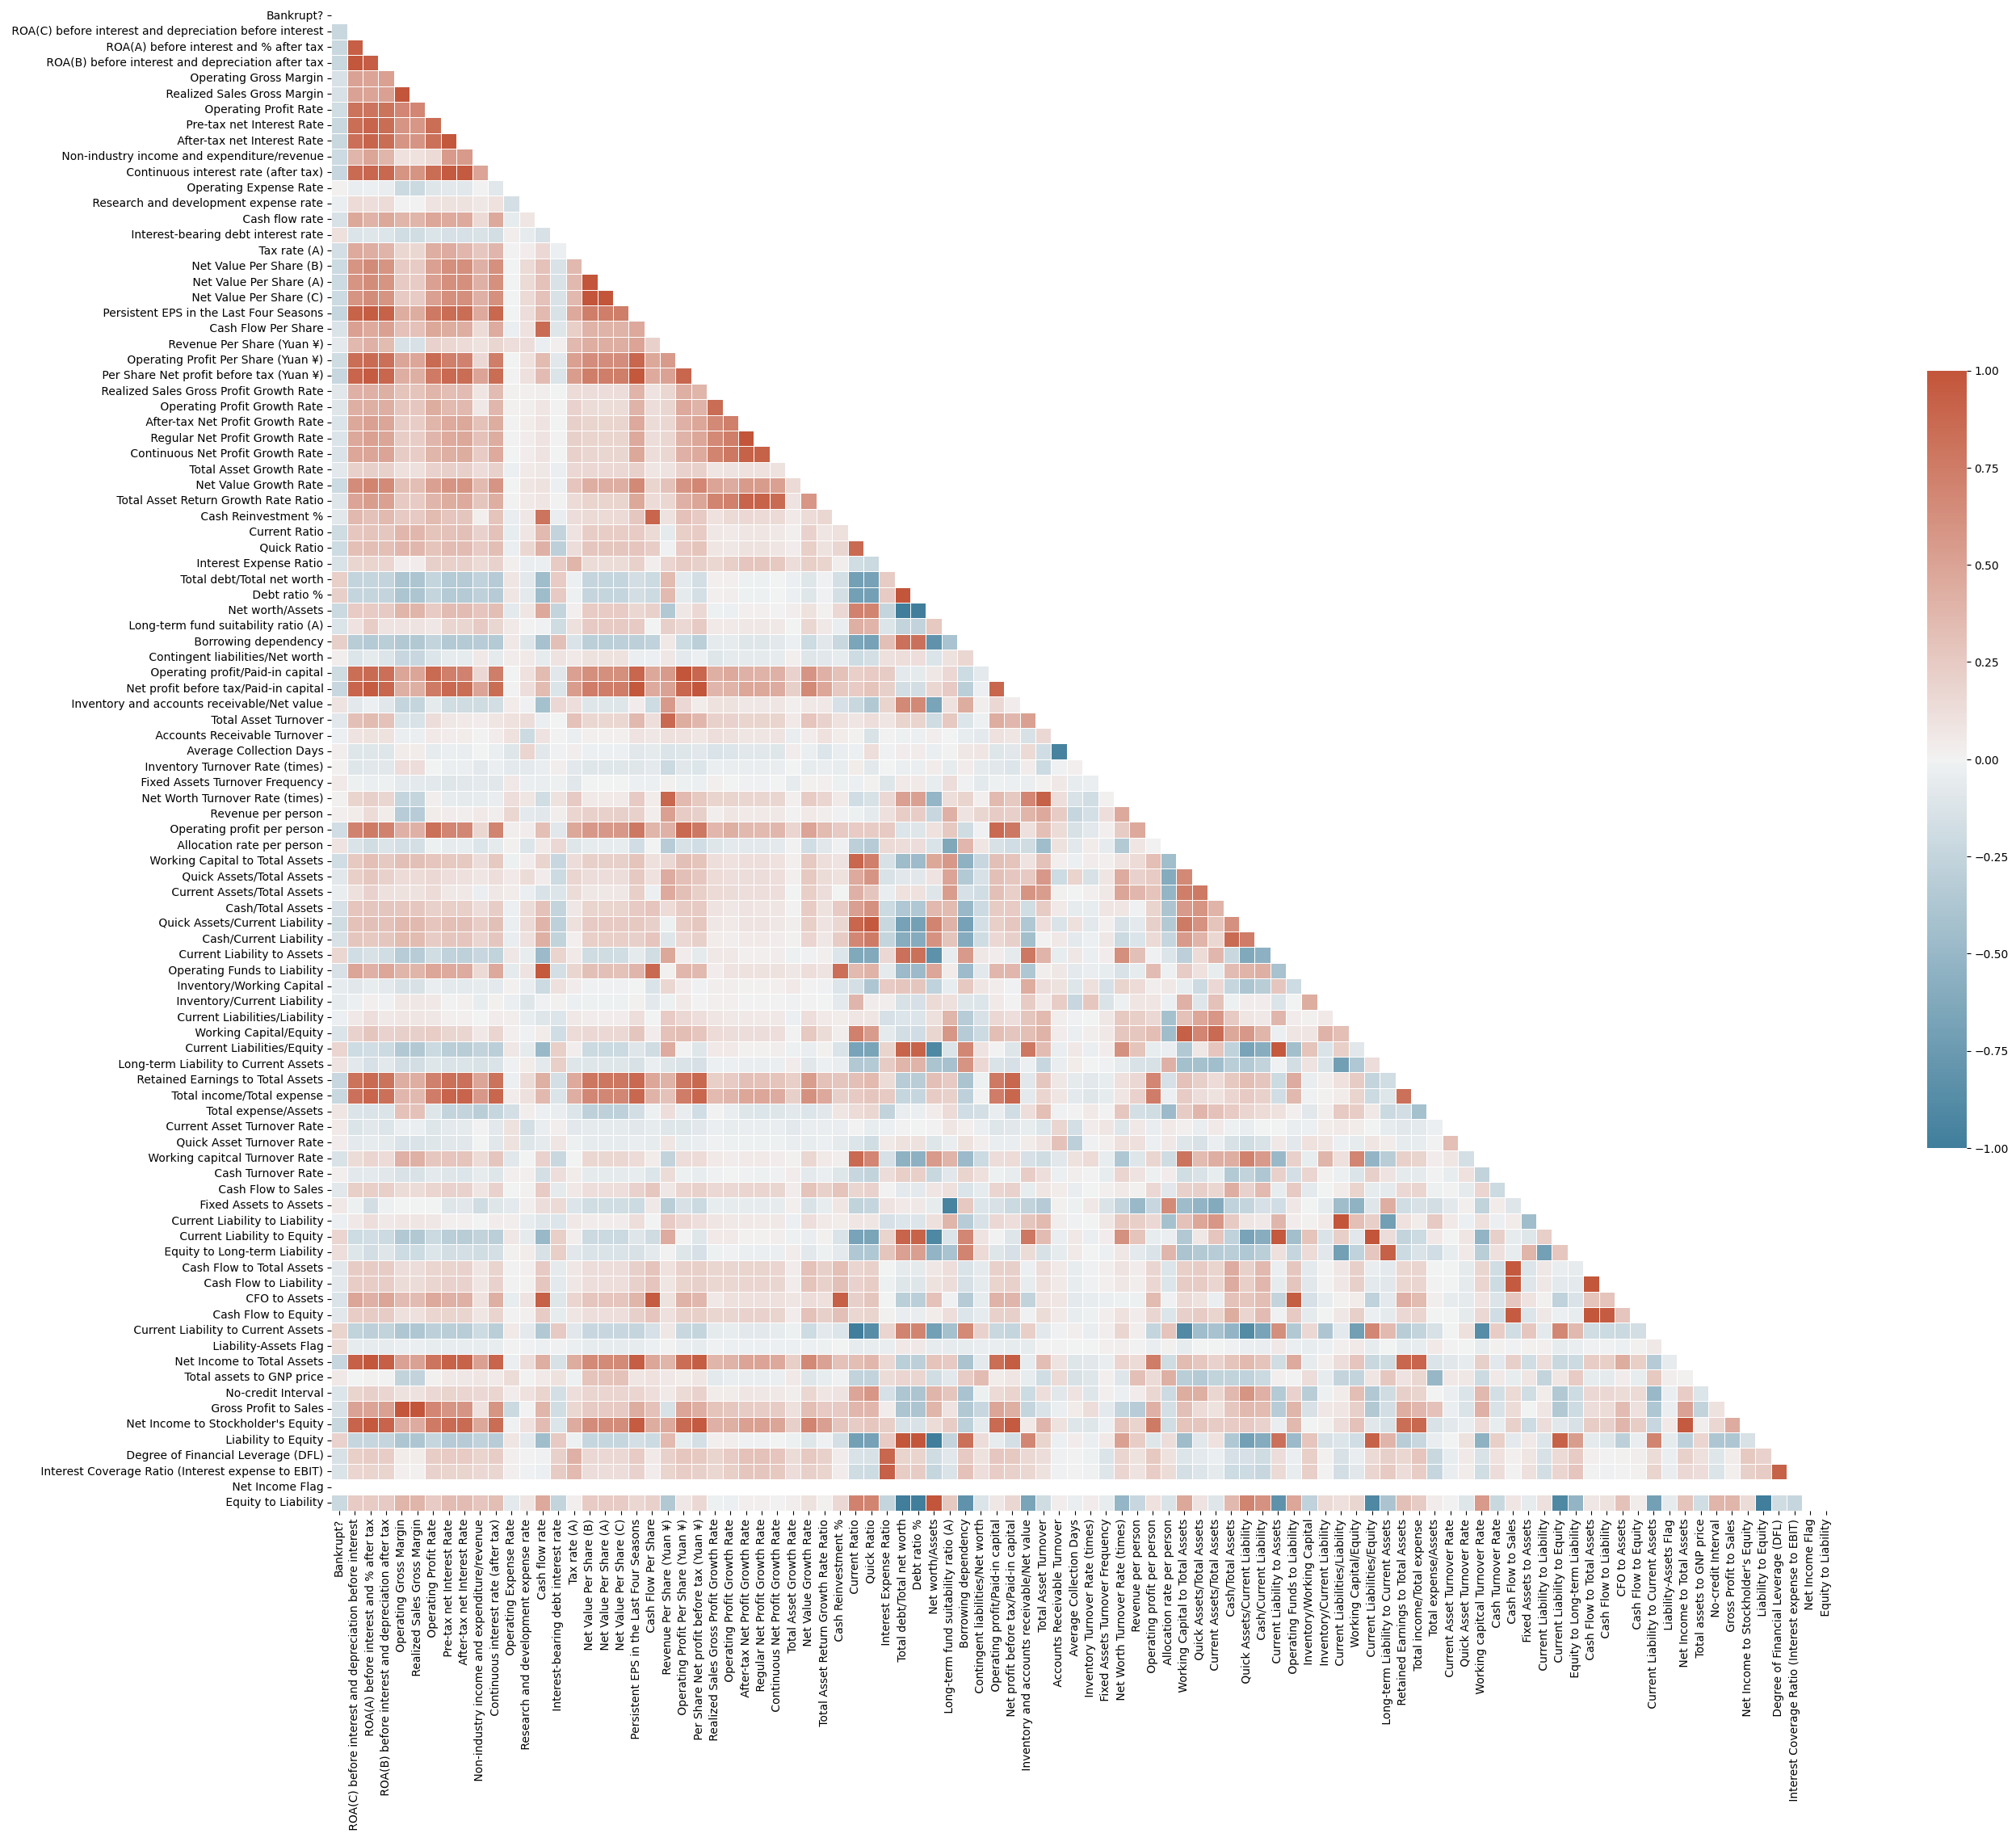

In [ ]:
f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

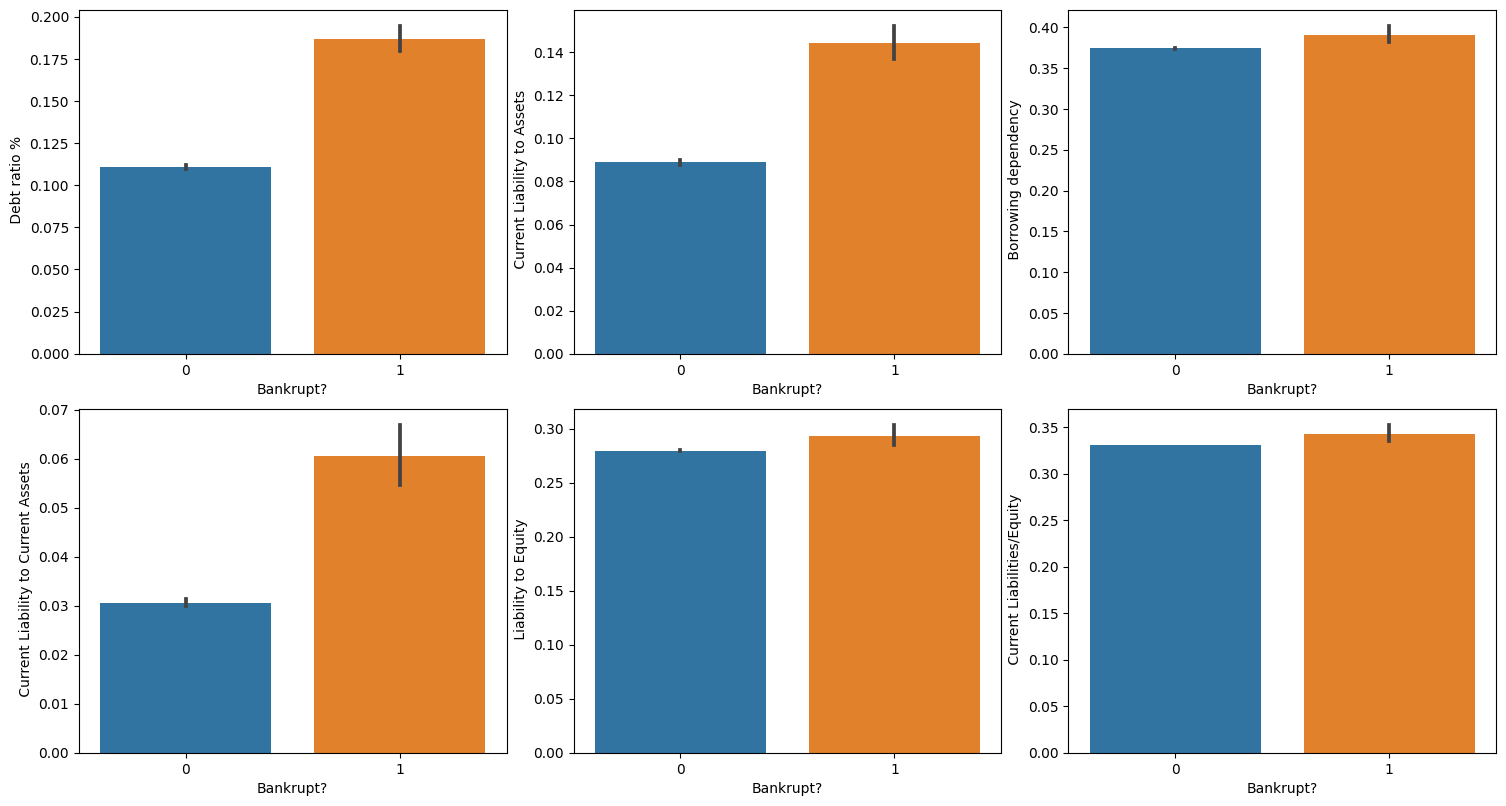

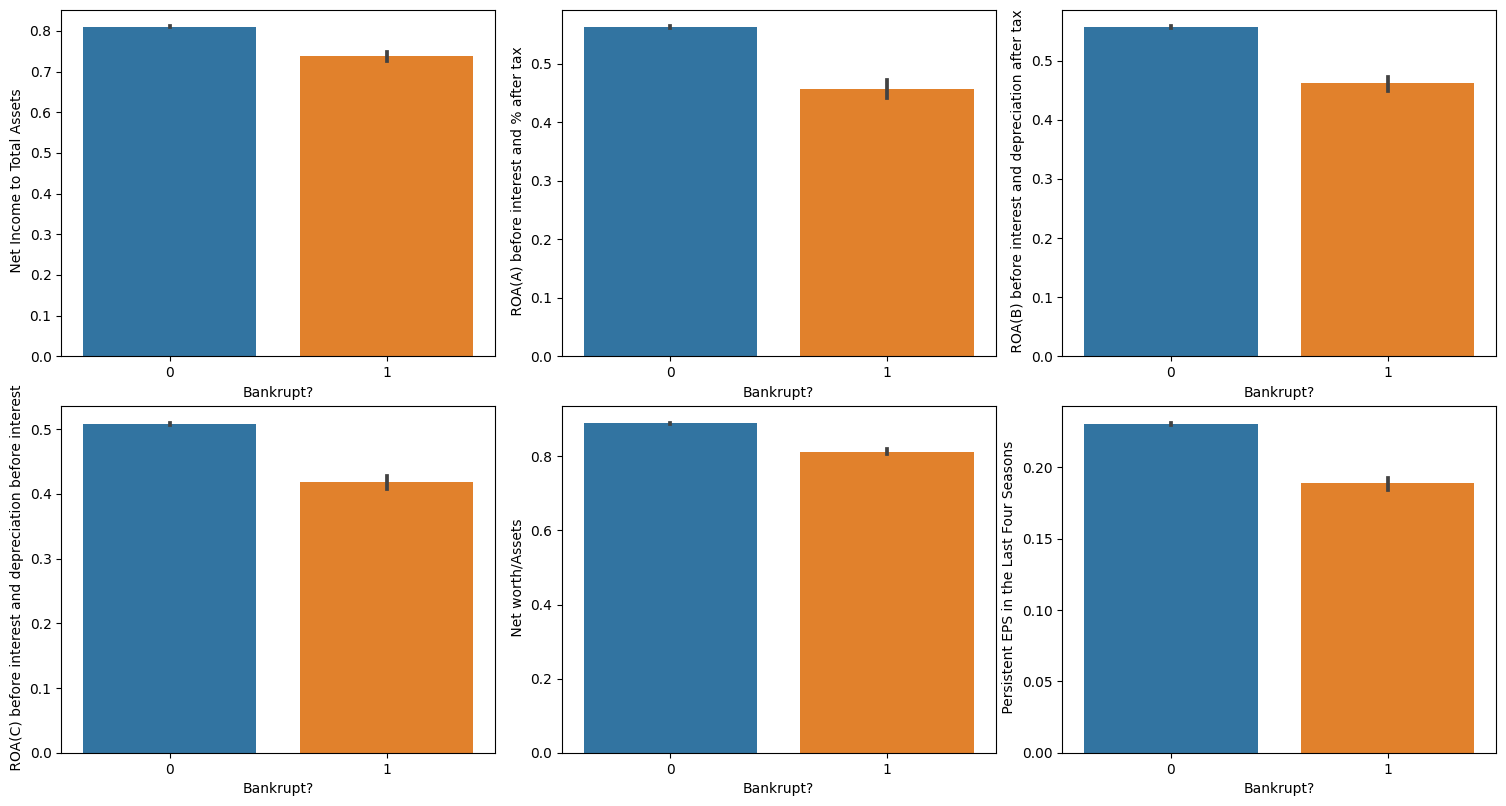

In [ ]:
#Top 6 positively and negatively correlated features

positive_corr = df[numeric_features].corrwith(df["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = df[numeric_features].corrwith(df["Bankrupt?"]).sort_values()[:6].index.tolist()

positive_corr = df[positive_corr + ["Bankrupt?"]].copy()
negative_corr = df[negative_corr + ["Bankrupt?"]].copy()


def corrbargraph(x_value, y_value):

    plt.figure(figsize=(15,8))

    for i in range(1,7):
        plt.subplot(2,3,i)
        sns.barplot(x = x_value, y = y_value[i-1],data = df)

    plt.tight_layout(pad=0.5)


x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)


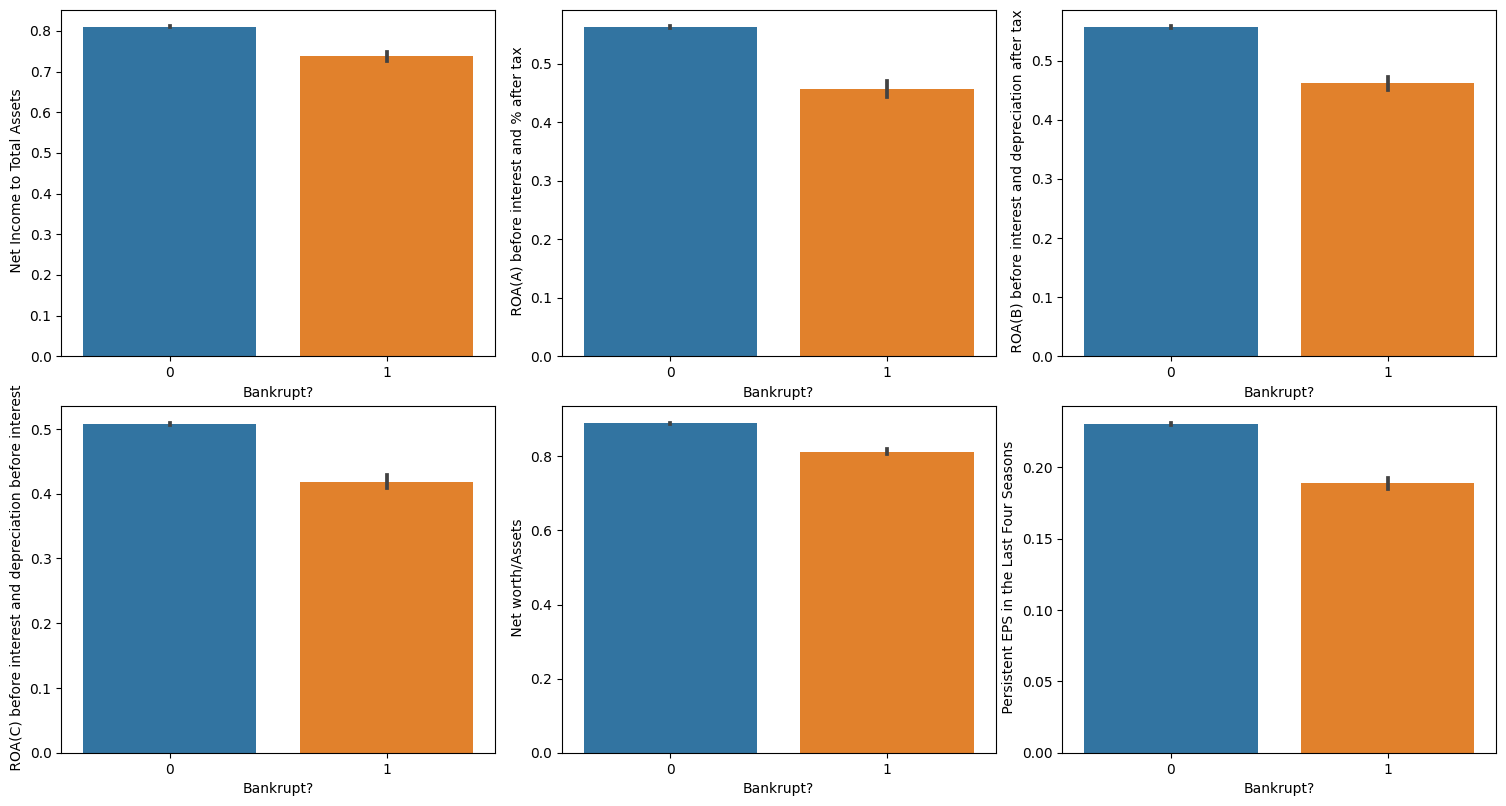

In [ ]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

KeyError: 'Current Liability To Assets'

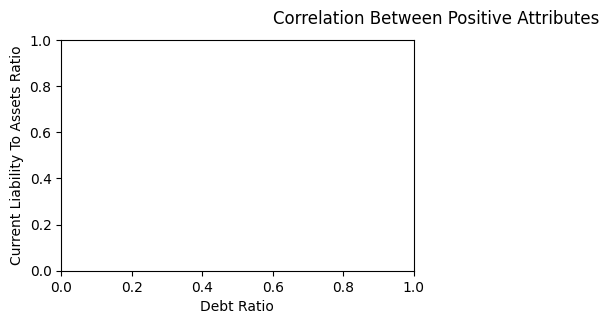

In [ ]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Positive Attributes")

plt.subplot(1,2,1)
plt.xlabel("Debt Ratio")
plt.ylabel("Current Liability To Assets Ratio")
plt.scatter(df[" Debt ratio %"],df["Current Liability To Assets"], marker='v',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("Borrowing Dependency")
plt.ylabel("Liability To Equity Ratio")
plt.scatter(df["Borrowing Dependency"],df["Liability To Equity"], marker='v',color = 'red')

plt.tight_layout(pad=0.8)

- All three ROAs are positively correlated amongst each other.
- Net value per share A,B and C are highly correlated between each other.
' Debt ratio %', ' Net worth/Assets' are negatively correlated.
- After tax net interest rate and pre tax net interets rate are also highely correlated.
- ' Non-industry income and expenditure/revenue' is negatively correlated with Operating Profit Rate.
- ' Operating Profit Growth Rate',' After-tax Net Profit Growth Rate' and ' Regular Net Profit Growth Rate' are also highely correlated.
- ' Per Share Net profit before tax (Yuan ¥)' and ' Persistent EPS in the Last Four Seasons' are highely correlated.

Conclusion: There are multiple multicollinearities in the dataset. So I can conclude from here that Regression model will not work properly on this dataset.

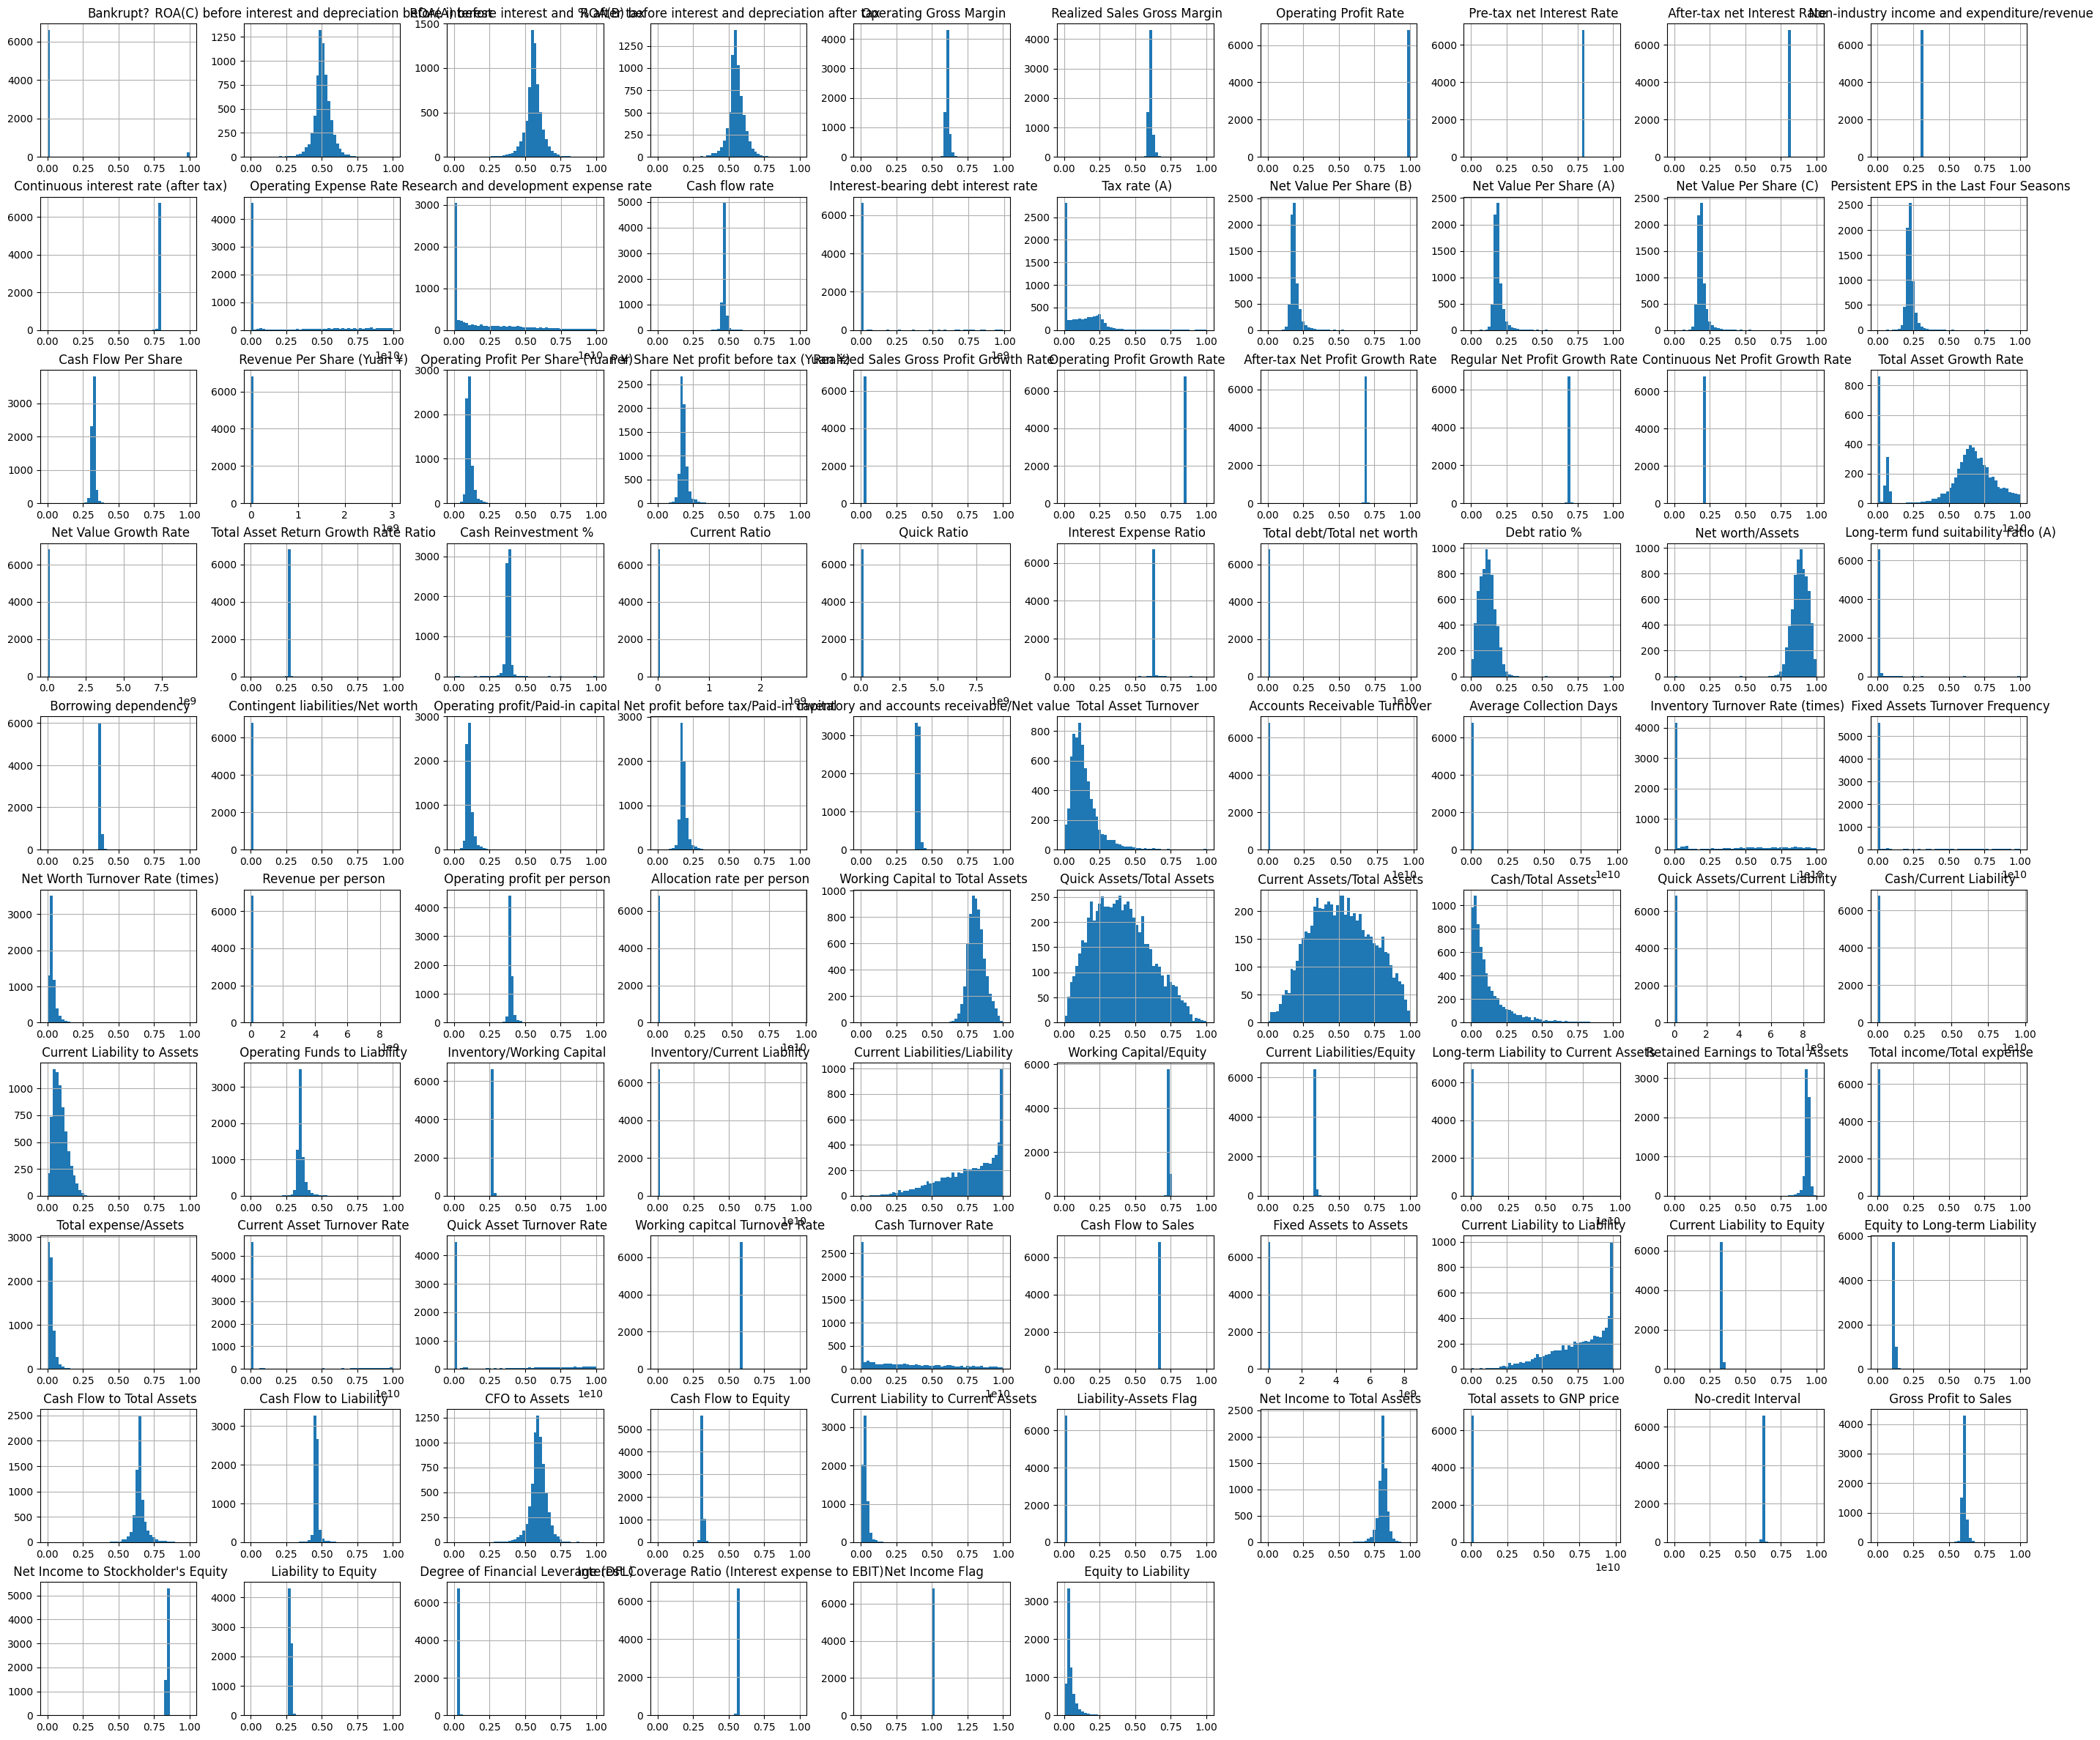

In [ ]:
#histogramy
df.hist(figsize = (35,30), bins = 50)
plt.show()

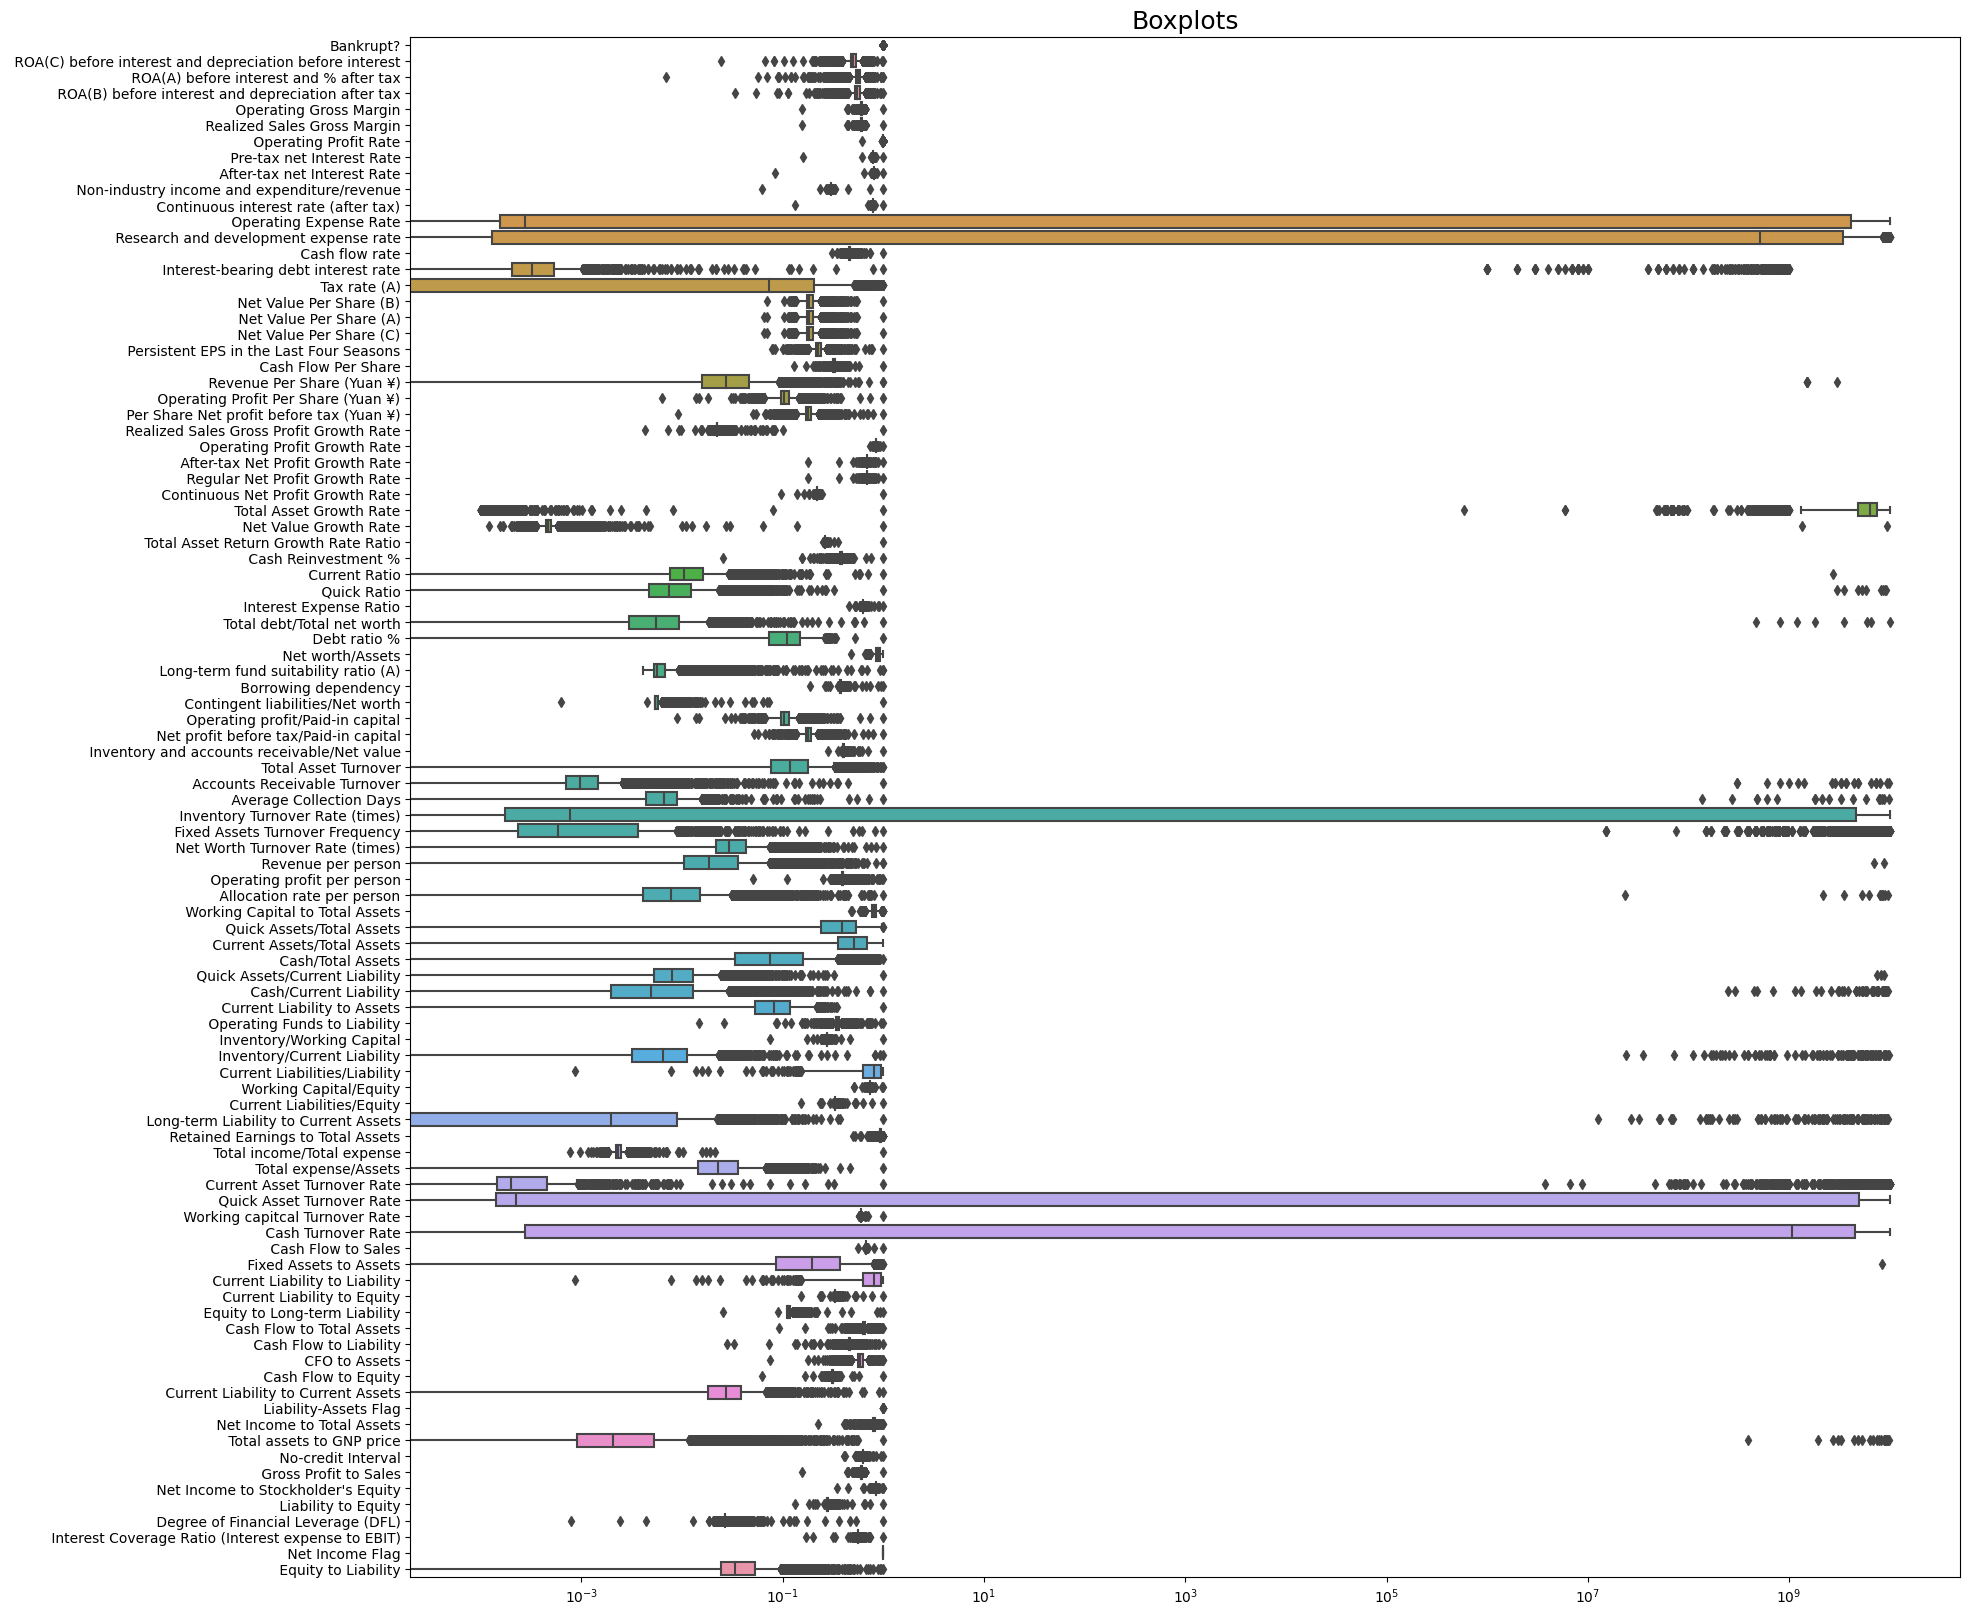

In [ ]:
# Boxploty wartości numerycznych

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

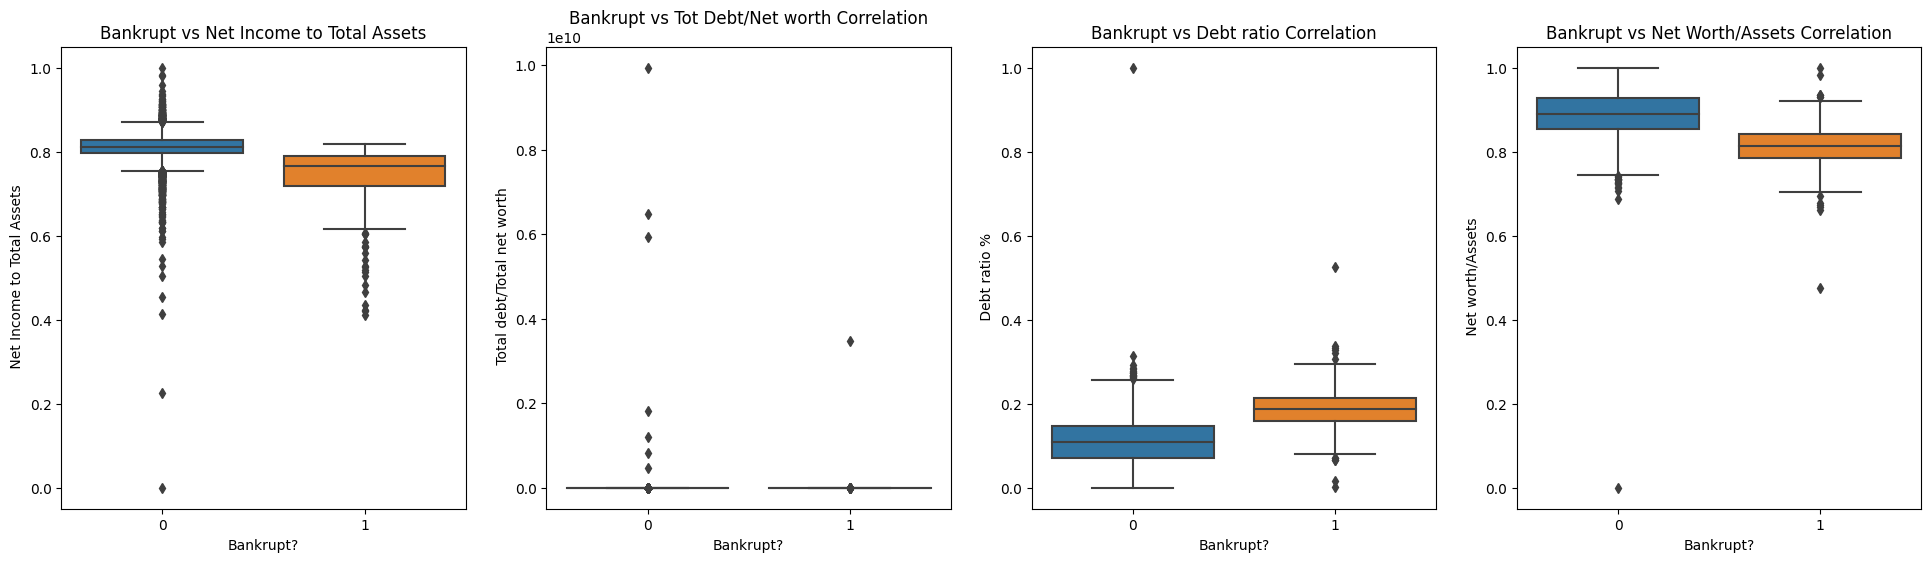

In [ ]:
#Porównaniu bankructwa a feature'ów,które mogą być skorelowane z tym

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt?', y=" Total debt/Total net worth", data=df, ax=axes[1])
axes[1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


sns.boxplot(x='Bankrupt?', y=" Debt ratio %", data=df, ax=axes[2])
axes[2].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt?', y=" Net worth/Assets", data=df, ax=axes[3])
axes[3].set_title('Bankrupt vs Net Worth/Assets Correlation')

plt.show()

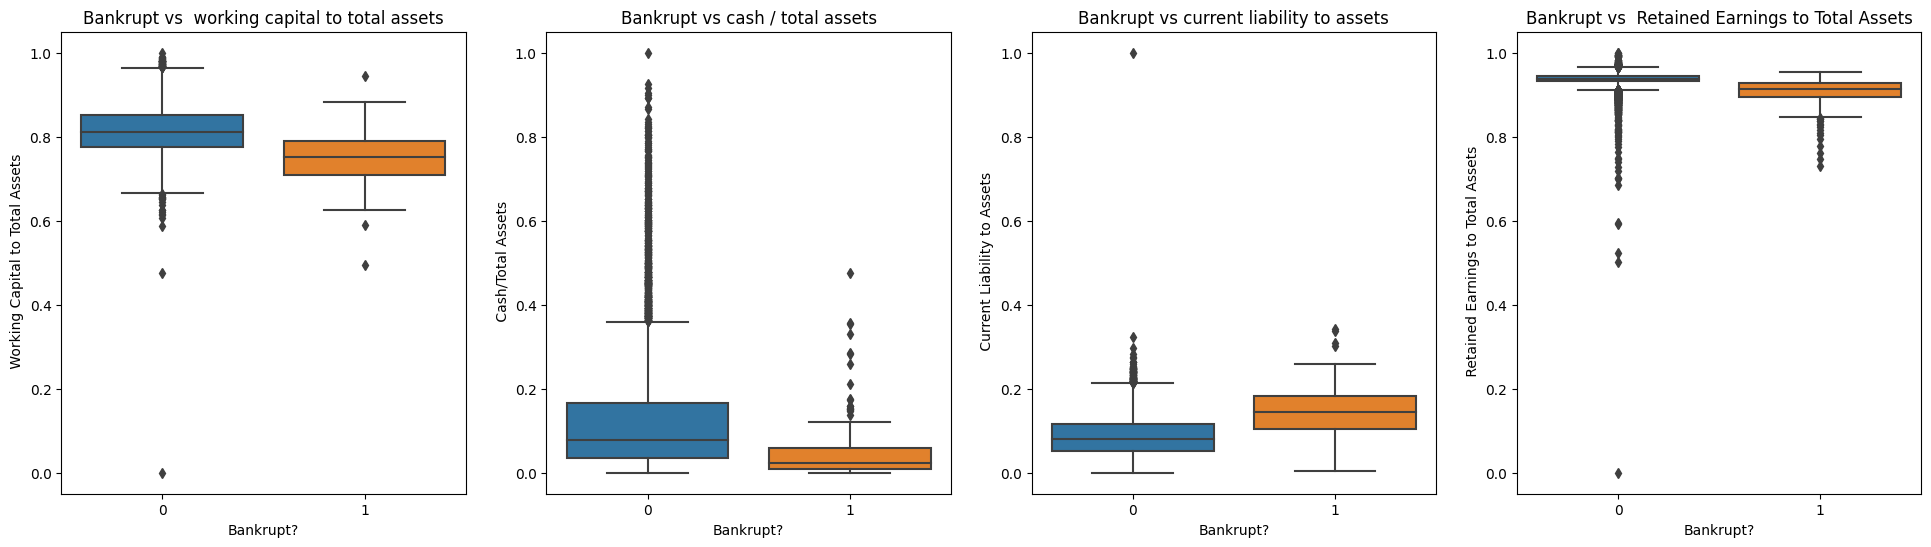

In [ ]:
#Porównaniu bankructwa a feature'ów,które mogą być skorelowane z tym
f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=" Working Capital to Total Assets", data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt?', y=" Cash/Total Assets", data=df, ax=axes[1])
axes[1].set_title('Bankrupt vs cash / total assets')


sns.boxplot(x='Bankrupt?', y=" Current Liability to Assets", data=df, ax=axes[2])
axes[2].set_title('Bankrupt vs current liability to assets')


sns.boxplot(x='Bankrupt?', y=" Retained Earnings to Total Assets", data=df, ax=axes[3])
axes[3].set_title('Bankrupt vs  Retained Earnings to Total Assets')

plt.show()

<ipython-input-19-541a739c6c12>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
<ipython-input-19-541a739c6c12>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
<ipython-input-19-541a739c6c12>:13:

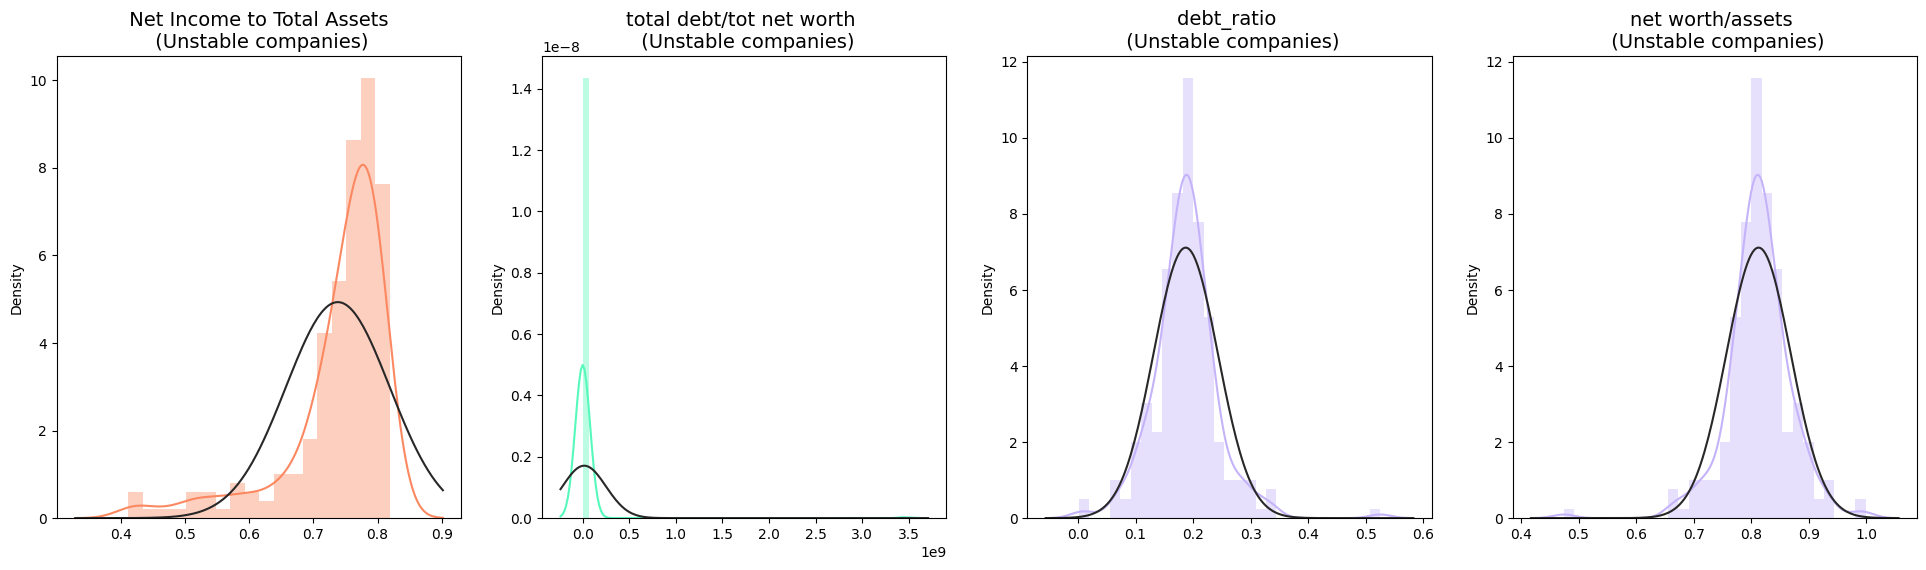

In [ ]:


f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = df[' Net Income to Total Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = df[' Total debt/Total net worth'].loc[df['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = df[' Debt ratio %'].loc[df['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = df[' Net worth/Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

In [ ]:
#Data exploration

def dataploting(df):

  print(df.shape[1])
  tab = []
  for i in range(df.shape[1]):
    actual_row =df.iloc[i:i+1]
    bankcroupt_row = df.iloc[:1]

    x_values = df.columns
    y_values = df.index

    plt.figure(figsize=(8, 6))
    plt.plot(y_values, actual_row.values.flatten(), label='Actual Column')
    plt.plot(y_values, bankcroupt_row.values.flatten(), label='Bankcroupt Column')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Comparison of Actual Column and Bankcroupt Column')
    plt.legend()
    plt.grid(True)
    plt.show()




In [ ]:
dataploting(df)

Dataset jest niezbalansowany, poczytam o technikach radzenia sobie z tym i spróbuję coś z tym zrobić.
~Janek

In [ ]:
 #Gradient Boosting
model = xgb.XGBClassifier()



model.fit(X_train_balanced, y_train_balanced)


predictions = model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))


conf_matrix = confusion_matrix(y_test, predictions)

true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_positive = conf_matrix[1, 1]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity (True Positive Rate): {:.2f}%".format(sensitivity * 100))
print("Specificity: {:.2f}%".format(specificity * 100))

Accuracy: 94.23%
Sensitivity (True Positive Rate): 50.00%
Specificity: 96.11%


In [ ]:
#neural network
import tensorflow as tf

X_train = tf.convert_to_tensor(X_train_balanced.values)
X_val = tf.convert_to_tensor(X_val.values)
X_test = tf.convert_to_tensor(X_test.values)
y_train = tf.convert_to_tensor(y_train_balanced.values)
y_val = tf.convert_to_tensor(y_val.values)
y_test = tf.convert_to_tensor(y_test.values)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64)

loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions based on a threshold (e.g., 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate precision
precision = precision_score(y_test, y_pred)

print("Precision: {:.4f}".format(precision))


Epoch 1/10
39/39 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.5004 - val_loss: nan - val_accuracy: 0.9536
Epoch 2/10
39/39 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.9536
Epoch 3/10
39/39 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.9536
Epoch 4/10
39/39 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.9536
Epoch 5/10
39/39 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.9536
Epoch 6/10
39/39 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.9536
Epoch 7/10
39/39 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.9536
Epoch 8/10
39/39 [==============================] - 0s 4ms/st

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logistic_regression = LogisticRegression()


logistic_regression.fit(X_train_balanced, y_train_balanced)


predictions = logistic_regression.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))


conf_matrix = confusion_matrix(y_test, predictions)

true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_positive = conf_matrix[1, 1]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity (True Positive Rate): {:.2f}%".format(sensitivity * 100))
print("Specificity: {:.2f}%".format(specificity * 100))





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier()


decision_tree.fit(X_train_balanced, y_train_balanced)


predictions = decision_tree.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))


conf_matrix = confusion_matrix(y_test, predictions)

true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_positive = conf_matrix[1, 1]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity (True Positive Rate): {:.2f}%".format(sensitivity * 100))
print("Specificity: {:.2f}%".format(specificity * 100))

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train_balanced, y_train_balanced)
predictions = model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

conf_matrix = confusion_matrix(y_val, predictions)
tn, fp, fn, tp = conf_matrix.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Precision: {:.4f}".format(precision))
print("Sensitivity (Recall): {:.4f}".format(recall))
print("Specificity: {:.4f}".format(specificity))

report = classification_report(y_val, predictions)
print("Classification Report:\n", report)

Accuracy: 94.67%
Precision: 0.4286
Sensitivity (Recall): 0.4426
Specificity: 0.9713
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1253
           1       0.43      0.44      0.44        61

    accuracy                           0.95      1314
   macro avg       0.70      0.71      0.70      1314
weighted avg       0.95      0.95      0.95      1314



In [ ]:
#champion model
model = xgb.XGBClassifier()



model.fit(X_train_balanced, y_train_balanced)


predictions = model.predict(X_val)


accuracy = accuracy_score(y_val, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

conf_matrix = confusion_matrix(y_, predictions)

true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_positive = conf_matrix[1, 1]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity (True Positive Rate): {:.2f}%".format(sensitivity * 100))
print("Specificity: {:.2f}%".format(specificity * 100))

Accuracy: 94.67%


ValueError: Found input variables with inconsistent numbers of samples: [1126, 1314]